#### Given the real data, the population of interval between gps fixes are found  -> (interval_population)
#### Find the appropriate distance at the interval -> (interval, distance)
Quesiton: What would be the good way to simulate new position at this point?
#### Choose x from uniform distribution of distance and find appropriate y
#### Then in combination, outputs the GPS trajectory 

## Imports

In [36]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


## read the csv file

In [30]:
data = pd.read_csv('penguin_combined_trace.csv').iloc[1:]
header = data.columns.values
print(header)

['time index' 'Acc_x' 'Acc_y' 'Acc_z' 'Mag_x' 'Mag_y' 'Mag_z' 'Temp, C'
 'Pressure, bar' 'Latitude' 'Longitude' 'Altitude']


## shorten the data if necessary

In [31]:
print(len(data))
short_len = int(len(data))

3560799


## Find the interval population from GPS fixes

In [229]:
short_data = data.head(n=short_len)#cv 
Latitude = np.array(short_data['Latitude'].tolist())
Longitude = np.array(short_data['Longitude'].tolist())
Altitude = np.array(short_data['Altitude'].tolist())
# These values include NaN


# Calculating the interval population
interval_population = []
lat_val = 0

for i in range(len(Latitude)):
    if i == 0:
        pass
    else:
        if (math.isnan(Latitude[i])):
            lat_val = lat_val + 1
        else:
    #        print("GPS fix available")
    #         print(lat_val)
    #         print(Latitude[i])
            interval_population.append(lat_val)
            lat_val = 0

# print(random.sample(interval_population,1))
print(interval_population[0:10])
print(len(interval_population))

[1592, 1161, 1723, 2538, 1507, 7105, 2927, 1032, 989, 989]
2056


## Find the distance between each fixes/ Visualization of data

43030.065265945195


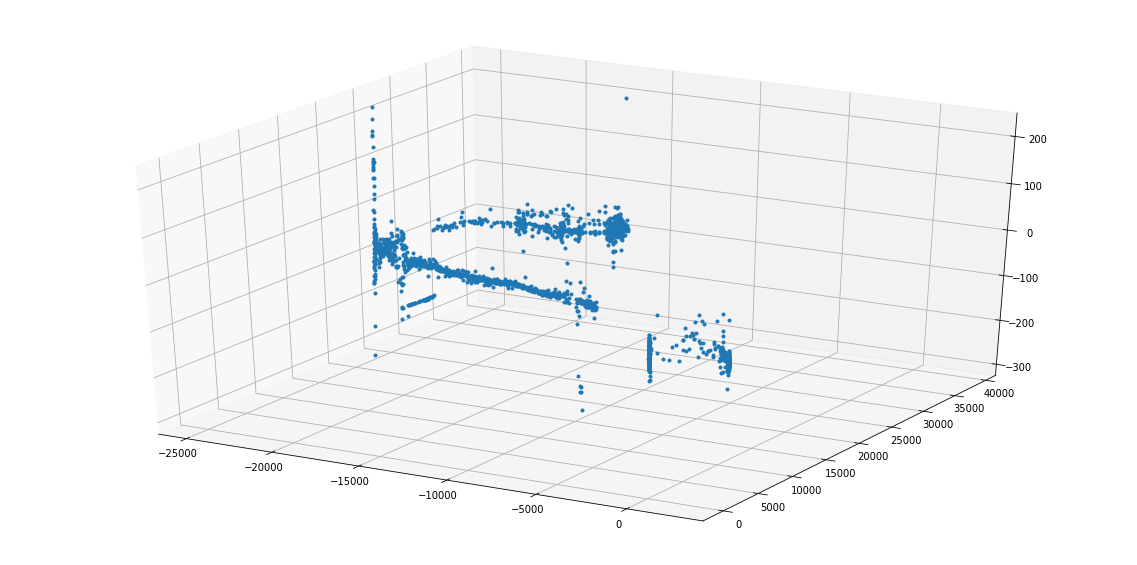

In [668]:
fx = short_data['Latitude'].dropna()
fy = short_data['Longitude'].dropna()
fz = short_data['Altitude'].dropna()

fx = np.array(fx)
fy = np.array(fy)
fz = np.array(fz)

R = 6378388.0 + fz # m
arc= 2.0*np.pi*R/360.0 # m/Â°
fdx = arc * np.cos(fx*np.pi/180.0) * np.hstack((0.0, np.diff(fy))) # in m
fdy = arc * np.hstack((0.0, np.diff(fx))) # in m
fdz = np.hstack((0.0, np.diff(fz)))

fmx = np.cumsum(fdx)
fmy = np.cumsum(fdy)
fmz = np.cumsum(fdz)

dx = fdx[1:]
dy = fdy[1:]
dz = fdz[1:]
    
distance_array = np.sqrt(dx**2 + dy**2 + dz**2)

fig = plt.figure(figsize=(20,10))
plot_3d = fig.gca(projection='3d')
s = 0
e = len(fmx)
plot_3d.plot(fmx[s:e], fmy[s:e], fmz[s:e],'.')

print(np.sqrt(fmx[-1]**2 + fmy[-1]**2 + fmz[-1]**2))

## Random select x,y,z from the given interval 
Needs better method

In [589]:
def get_interval_and_distance(int_array, dist_array):
    interval = random.sample(int_array,1)[0]
#     print("interval")
#     print(interval)
    idx = random.sample(np.where(np.array(int_array) == interval)[0].tolist(),1)[0]
    distance = dist_array[idx]
    
    x = dx[idx]
    y = dy[idx]
    z = dz[idx]
    
    return interval, x, y, z

interval, x, y, z = get_interval_and_distance(interval_population,distance_array)

## Simulate GPS data 

56543.874500702535


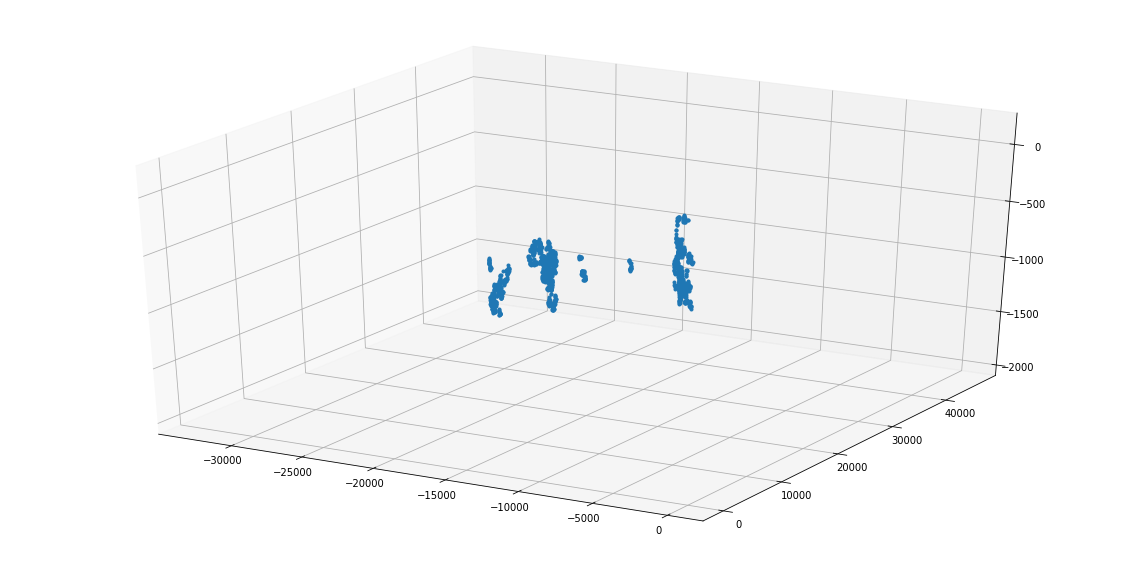

In [699]:
# Input: total number of fixes 
# Starting position at 0,0,0
# Output: interval, dx, dy, dz (unit: meter)

n_fix = 2000

def simulate_GPS_data(n_fix):
    x_loc = 0
    y_loc = 0
    z_loc = 0
    x_locs = []
    y_locs = []
    z_locs = []
    intervals = []

    for i in range(n_fix):
        interval, x, y, z = get_interval_and_distance(interval_population,distance_array)
        intervals.append(interval)
        x_loc += x
        y_loc += y 
        z_loc += z 
        x_locs.append(x_loc)
        y_locs.append(y_loc)
        z_locs.append(z_loc)
        
    # interval_at = np.cumsum(interval)
    # print(len(interval_at))
    # print(len(x))
    filename = open("GPS_simulation.txt",'w')
    for i in range(len(intervals)):
        print(intervals[i], x_locs[i], y_locs[i], z_locs[i] ,file = filename)
    filename.close()
        
    return intervals, x_locs, y_locs, z_locs
    
#Simulate GPS data
interval, x, y, z = simulate_GPS_data(n_fix)

# Plot
fig = plt.figure(figsize=(20,10))
plot_3d = fig.gca(projection='3d')
plot_3d.plot(x, y, z,'.')

print(np.sqrt(x[-1]**2 + y[-1]**2 + z[-1]))

In [ ]:
## other correlation etc 

[[1.         0.77863909]
 [0.77863909 1.        ]]
2056
2056


663
661
1525
594


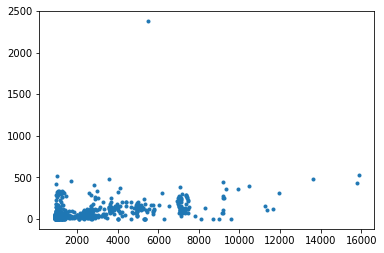

In [235]:
print(np.corrcoef(interval_population,distance))
print(len(interval_population))
print(len(distance))

plt.plot(interval_population,distance,'.')
plt.show()

int_noout = np.array(interval_population)
dist_noout = np.array(distance)

for i in range(4):
    idx = np.argmax(int_noout)
    print(idx)
    int_noout = np.delete(int_noout,idx)
    dist_noout = np.delete(dist_noout,idx)
    
plt.plot(int_noout,dist_noout,'.')